# Analysis data of 100 sneaker shops

<b>Project Description:</b><br>
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

### Download all data locally

In [88]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [89]:
#Url Path for the data.
url1='2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv'

#Loading files locally in to dataframe
data_orders=pd.read_csv(url1)


In [90]:
data_orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


###  Looking at the general information

In [91]:
#Verifying basic informatoin and data type of the table.
data_orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 875.8 KB


No null value present in any of the columns.

In [92]:
#checking the data in the table.
display(data_orders.describe())
display(data_orders.describe(include=['object']))

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


,payment_method,created_at
count,5000,5000
unique,3,4991
top,credit_card,2017-03-28 4:00:00
freq,1735,3


##### Conclusion:
1. As we can see above mean, median and max values are very far for the order_amount, total_items. It seems there are outliers available in the data.

### Box plot diagram to show outliers.

<AxesSubplot:xlabel='order_amount'>

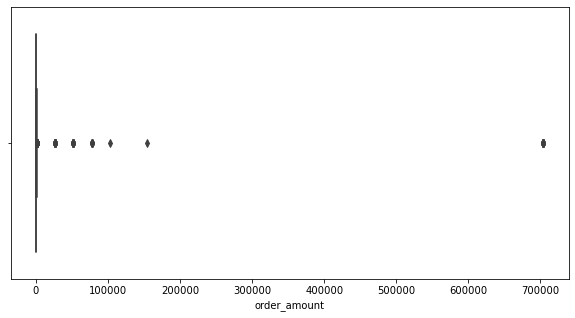

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data_orders['order_amount'])

As we can see above there are many black dots in the graph above so we can say that there are some big outliers available in the data which are causing AOV skewed to $3145.13.

##### Calculating Outliers point using IQR score:

In [94]:
Q1 = data_orders['order_amount'].quantile(0.25)
Q3 = data_orders['order_amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

227.0


In [95]:
data_orders_out=data_orders[(data_orders['order_amount'] < (Q1 - 1.5 * IQR)) |(data_orders['order_amount'] > (Q3 + 1.5 * IQR))]
data_orders_out.shape

(141, 7)

So as we can see above there are almost 141 rows which are having high order values which are skewing our mean. Lets see some more detail below.

## Question 1. 

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

<b>1.</b> Mean of 'order_amount' is $3145.13 Which is relatively very far in comaprison to median 284 and std. 41282. The reason which we find above is the presence of outliers in the data. So after some initial analysis of the order amount, I found there are approx. 141 orders which are considerered as outliers and also it is causing AOV to increase. <br>
So as a better way to evaluate this data, we should first remove these outliers and then try to calculate AOV again.

<b>2.</b> To answer our question even further, we can also analyze if there are any specific shops that are selling high-value orders?

In [96]:
data_orders_group=data_orders.groupby('shop_id').agg({'order_amount':'sum', 'order_id':'count','total_items':'sum'}).sort_values(by=['order_amount'],ascending=False).reset_index()
data_orders_group.columns=['shop_id','total_order_amt','total_orders','total_items']
data_orders_group['avg_amt_per_item']=data_orders_group.total_order_amt/data_orders_group.total_items
data_orders_group

,shop_id,total_order_amt,total_orders,total_items,avg_amt_per_item
0,42,11990176,51,34063,352.0
1,78,2263800,46,88,25725.0
2,89,23128,61,118,196.0
3,81,22656,59,128,177.0
4,6,22627,59,121,187.0
...,...,...,...,...,...
95,2,9588,55,102,94.0
96,100,8547,40,77,111.0
97,56,8073,37,69,117.0
98,32,7979,42,79,101.0


In [97]:
data_orders_group.sort_values(by=['total_items','total_orders'],ascending=False)

,shop_id,total_order_amt,total_orders,total_items,avg_amt_per_item
0,42,11990176,51,34063,352.0
5,13,21760,63,136,160.0
10,84,20196,59,132,153.0
53,53,14560,68,130,112.0
7,71,21320,66,130,164.0
...,...,...,...,...,...
64,38,13680,35,72,190.0
88,16,11076,41,71,156.0
91,44,10224,39,71,144.0
97,56,8073,37,69,117.0


In [98]:
data_orders_group=data_orders_group.sort_values(by=['avg_amt_per_item'],ascending=False)
data_orders_group

,shop_id,total_order_amt,total_orders,total_items,avg_amt_per_item
1,78,2263800,46,88,25725.0
0,42,11990176,51,34063,352.0
15,12,18693,53,93,201.0
2,89,23128,61,118,196.0
16,99,18330,54,94,195.0
...,...,...,...,...,...
79,7,12208,56,109,112.0
96,100,8547,40,77,111.0
98,32,7979,42,79,101.0
95,2,9588,55,102,94.0


As we can see above shop_id 78 are coming in top 2 w.r.t total_order_amount but still they are not selling large no. of items and orders. Also average amount per item is far away from others shops. so now lets remove this shop_id and then will see is there any change in the mean and median values?

In [99]:
data_orders_new=data_orders[~data_orders['shop_id'].isin([78])]
data_orders_new.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029
std,1444.498907,29.014845,87.846007,41155.996469,116.857286
min,1.000000,1.000000,607.000000,90.000000,1.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000


There is a change but not big change. Now we will remove shop id 42 as well and then will see these statistics again.

In [100]:
data_orders_new=data_orders[~data_orders['shop_id'].isin([42,78])]
data_orders_new.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717
std,1444.221163,29.154367,86.887947,155.941112,0.982602
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000


##### Conclusion
1. Yes there is a big change now in all the statistics after removing shop_ids 42 and 78 both.
2. We need to check the data of these shops in detail. Might be these shops are not handling their data entry system properly. Especially the shop_id 78 is having a great difference in the avg_amt_per_item even when we have the same product in all these shops.

### b. What metric would you report for this dataset?

I would suggest below metric for this dataset:
1. Average order value without including the shop ids 78 and 42.
2. Average no. of orders per store without including the shop ids 78 and 42.
3. Average items per order without including the shop ids 78 and 42.
4. Average items per store without including the shop ids 78 and 42.

### c. What is its value?

In [104]:
print('Average order value is:', round(data_orders_new['order_amount'].mean(),2))

Average order value is: 300.16


In [102]:
data_orders_new_group=data_orders_new.groupby('shop_id').agg({'order_amount':'sum', 'order_id':'count','total_items':'sum'}).sort_values(by=['order_amount'],ascending=False).reset_index()
data_orders_new_group.columns=['shop_id','total_order_amt','total_orders','total_items']
data_orders_new_group['avg_amt_per_item']=data_orders_new_group.total_order_amt/data_orders_new_group.total_items

print('Average no. of orders per store is:', round(data_orders_new_group['total_orders'].mean(),2))

Average no. of orders per store is: 50.03


In [105]:
print('Average items per order:', round(data_orders_new['total_items'].mean(),2))
print('Average items per store:', round(data_orders_new_group['avg_amt_per_item'].mean(),2))

Average items per order: 2.0
Average items per store: 150.22
